In [25]:
import sys
import numpy as np
sys.path.append("/SNS/users/imeliamb/git/machine_learning/src")
import importlib
import models
import os
import matplotlib
import matplotlib.pyplot as plt

In [42]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs_pars.npy"))[:1000000]
refl = np.load(os.path.join(data_dir, "orhs_data.npy"))[:1000000]
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

#refl = np.power(10, refl)/q_values**2*q_values[0]**2

idx = 0

refl= np.asarray(refl[:-nset])
pars= np.asarray (pars[:-nset])

testset= np.asarray(refl[-nset:])
testsetout= np.asarray (pars[-nset:])
    

(1000000,)
(1000000, 100)
(100,)


In [52]:
import importlib
importlib.reload(models)
n_data = refl.shape[0]
n_features = refl.shape[1]
n_outputs = 10

ae_model, encoder, decoder =models.auto_encoder(n_data, n_features, n_outputs)
history = ae_model.fit(refl, refl,
                        epochs=20, batch_size=256,
                        validation_data=(testset, testset))
models.save(ae_model, encoder, decoder, "/SNS/users/imeliamb/git/machine_learning/data")

Auto-encoder ready
Epoch 1/20
3903/3903 [==============================] - 32s 8ms/step - loss: 0.0561 - val_loss: 0.0145
Epoch 2/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0102 - val_loss: 0.0080
Epoch 3/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0080 - val_loss: 0.0067
Epoch 4/20
3903/3903 [==============================] - 32s 8ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 5/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 6/20
3903/3903 [==============================] - 32s 8ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 7/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 8/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 9/20
3903/3903 [==============================] - 31s 8ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/20
3903/3903 [==============================]

AttributeError: module 'models' has no attribute 'save'

In [47]:
importlib.reload(models)
models.save_model(ae_model, encoder, decoder, "/SNS/users/imeliamb/data/ml")

In [48]:
y_pred = ae_model.predict(testset)
latent_space = encoder.predict(testset)
print(y_pred.shape)
print(latent_space.shape)
idx=0

32/32 [==============================] - 0s 3ms/step
(1000, 100)
(1000, 4)


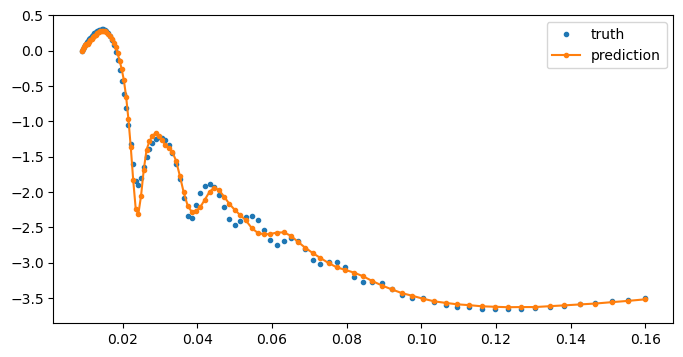

In [50]:
fig=plt.figure(dpi=100, figsize=[8,4])
plt.plot(q_values, testset[idx], marker='.', linestyle='', label='truth')
plt.plot(q_values, y_pred[idx], marker='.', linestyle='-', label='prediction')

plt.legend()
plt.show()

idx=idx+1

In [51]:
from sklearn.manifold import TSNE
tsne1 = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(latent_space).T


(2, 1000)


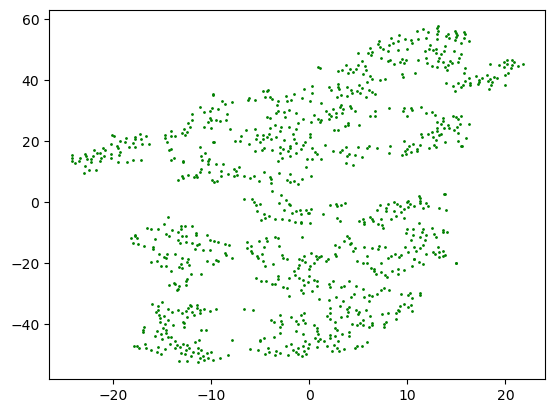

In [34]:
print(tsne1.shape)
fig = plt.figure()
plt.scatter(tsne1[0], tsne1[1], c='green', s=1)
plt.show()